In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from collections import Counter
import itertools
import matplotlib.pyplot as plt


def get_page_info():
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
    }

    req = requests.get("https://www.imdb.com/calendar/?ref_=nv_mv_cal", headers = headers)

    soup = BeautifulSoup(req.text, 'lxml')

    page = soup.find("section", class_="ipc-page-section ipc-page-section--base")

    movie = page.find_all(attrs={"data-testid": "coming-soon-entry"})

    return movie

def get_movie_info(movie):
    info = []
    for m in movie:
        info.append(m.find("div", class_={"ipc-metadata-list-summary-item__tc"}))
    return info



,電影名稱,標籤
0,Magic Mike's Last Dance (2023),"[Comedy, Drama]"
1,Seriously Red (2022),"[Comedy, Drama, Music]"
2,Huesera: The Bone Woman (2022),"[Drama, Horror]"
3,She Came from the Woods (2022),"[Comedy, Horror]"
4,iMordecai (2022),"[Comedy, Drama, Family]"
...,...,...
159,El Muerto (2024),"[Action, Adventure, Sci-Fi]"
160,The Tiger's Apprentice (2024),"[Animation, Action, Adventure]"
161,Night Swim (2024),[Horror]
162,Untitled Dirty Dancing Project (2024),"[Drama, Music, Musical]"


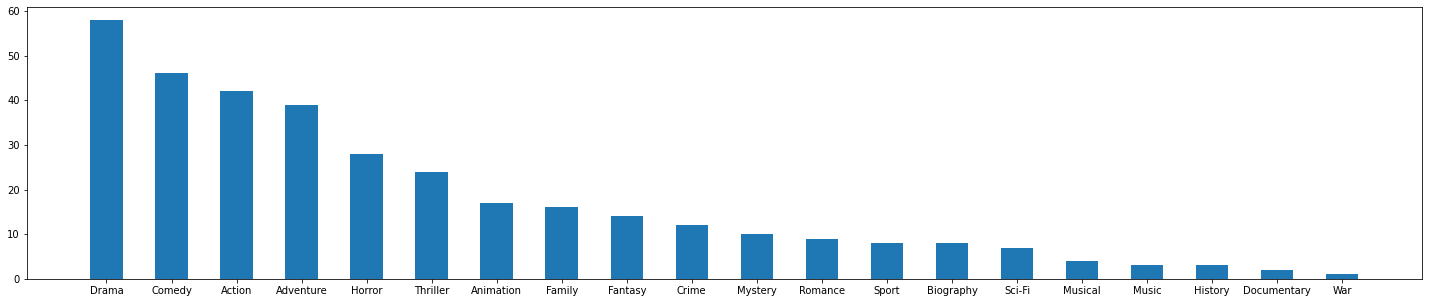

In [ ]:
info = get_movie_info(get_page_info())
name = []
tags = []

for i in info:
    name.append((i.find("a", class_={"ipc-metadata-list-summary-item__t"})).get_text())
    
    tag_l = i.find("ul", class_={"ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--no-wrap ipc-inline-list--inline ipc-metadata-list-summary-item__tl base"})
    if tag_l is None:
      tags.append("")
      continue

    temp = []
    for t in tag_l:
        temp.append(t.get_text())
    tags.append(temp)

t_counter = Counter(list(itertools.chain.from_iterable(tags))) #class 'collections.Counter'
sort_t = dict(sorted(t_counter.items(), key=lambda i: i[1], reverse=True))

df = pd.DataFrame()
df['電影名稱'] = name
df['標籤'] = tags

plt.figure(figsize=(25, 5))
plt.bar(sort_t.keys(), sort_t.values(), width=0.5)

display(df)
plt.show()